In [2]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
users_names = ["UserID","Gender", "Age", "Occupation", "Zip-code"]
users_table = pandas.read_table(filepath_or_buffer='./mvlns_1m/users.dat',header=None,names=users_names, sep='::', engine='python', memory_map=True)
users_table

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
movies_names = ["MovieID","Title", "Genre"]
movies_table = pandas.read_table(filepath_or_buffer='./mvlns_1m/movies.dat',header=None,names=movies_names, sep='::', engine='python', encoding="windows-1251", memory_map=True)
movies_table

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
ratings_names = ["UserID","MovieID", "Rating", "Timestamp"]
ratings_table = pandas.read_table(filepath_or_buffer='./mvlns_1m/ratings.dat',header=None,names=ratings_names, sep='::', engine='python', memory_map=True)
ratings_table

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
ratings_with_users = pandas.merge(users_table, ratings_table, how='left', on='UserID', validate="one_to_many")
ratings_with_users

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [7]:
overall_dataframe = pandas.merge(ratings_with_users, movies_table, how='left', on='MovieID', validate="many_to_one")
overall_dataframe

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,M,25,6,11106,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,M,25,6,11106,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,M,25,6,11106,1096,4,956715648,Sophie's Choice (1982),Drama


In [8]:
pivot_dataframe = pandas.pivot_table(overall_dataframe,'Rating', index='Title', columns=['Age',"Gender"], aggfunc='sum')

pivot_dataframe

Age                                          1           18            25  \
Gender                                        F     M     F      M      F   
Title                                                                       
$1,000,000 Duck (1971)                      NaN   NaN   5.0   13.0   10.0   
'Night Mother (1986)                        3.0   1.0   9.0    5.0   63.0   
'Til There Was You (1997)                   2.0   5.0  16.0    4.0   56.0   
'burbs, The (1989)                          NaN   9.0  85.0  207.0   94.0   
...And Justice for All (1979)               NaN   3.0   NaN   24.0   34.0   
...                                         ...   ...   ...    ...    ...   
Zed & Two Noughts, A (1985)                 NaN   1.0   3.0    NaN   10.0   
Zero Effect (1998)                          9.0  24.0  32.0  201.0  107.0   
Zero Kelvin (Kjжrlighetens kjшtere) (1995)  NaN   NaN   NaN    NaN    NaN   
Zeus and Roxanne (1997)                     1.0   8.0   5.0    5.0   12.0   
eXistenZ (1999)                             4.0  40.0  38.0  235.0  105.0   

Age                                                  35           45        \
Gender                                          M     F      M     F     M   
Title                                                                        
$1,000,000 Duck (1971)                       24.0  29.0   18.0   NaN   2.0   
'Night Mother (1986)                         26.0  21.0   40.0  15.0   8.0   
'Til There Was You (1997)                     8.0   9.0   20.0   5.0   2.0   
'burbs, The (1989)                          211.0  49.0  106.0   6.0  22.0   
...And Justice for All (1979)               182.0  45.0  211.0  20.0  62.0   
...                                           ...   ...    ...   ...   ...   
Zed & Two Noughts, A (1985)                  44.0  15.0   19.0   NaN   4.0   
Zero Effect (1998)                          428.0  44.0  122.0  16.0  48.0   
Zero Kelvin (Kjжrlighetens kjшtere) (1995)    NaN   NaN    7.0   NaN   NaN   
Zeus and Roxanne (1997)                       5.0   7.0   14.0   NaN   1.0   
eXistenZ (1999)                             487.0  37.0  212.0  22.0  65.0   

Age                                           50          56        
Gender                                         F     M     F     M  
Title                                                               
$1,000,000 Duck (1971)                      10.0   1.0   NaN   NaN  
'Night Mother (1986)                        11.0  21.0   NaN  13.0  
'Til There Was You (1997)                    5.0   NaN   6.0   2.0  
'burbs, The (1989)                          22.0  55.0   1.0  15.0  
...And Justice for All (1979)               22.0  81.0  13.0  42.0  
...                                          ...   ...   ...   ...  
Zed & Two Noughts, A (1985)                  NaN   3.0   NaN   NaN  
Zero Effect (1998)                          13.0  56.0   7.0  22.0  
Zero Kelvin (Kjжrlighetens kjшtere) (1995)   NaN   NaN   NaN   NaN  
Zeus and Roxanne (1997)                      NaN   NaN   NaN   NaN  
eXistenZ (1999)                             14.0  65.0   NaN  11.0  

[3706 rows x 14 columns]

In [9]:
rating_by_sex = pandas.pivot_table(overall_dataframe,'Rating', index='Title', columns='Gender', aggfunc='sum')
rating_by_sex

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",54.0,58.0
'Night Mother (1986),122.0,114.0
'Til There Was You (1997),99.0,41.0
"'burbs, The (1989)",257.0,625.0
...And Justice for All (1979),134.0,605.0
...,...,...
"Zed & Two Noughts, A (1985)",28.0,71.0
Zero Effect (1998),228.0,901.0
Zero Kelvin (Kjжrlighetens kjшtere) (1995),NaN,7.0


<AxesSubplot: xlabel='Sum of ratings given by men', ylabel='Title'>

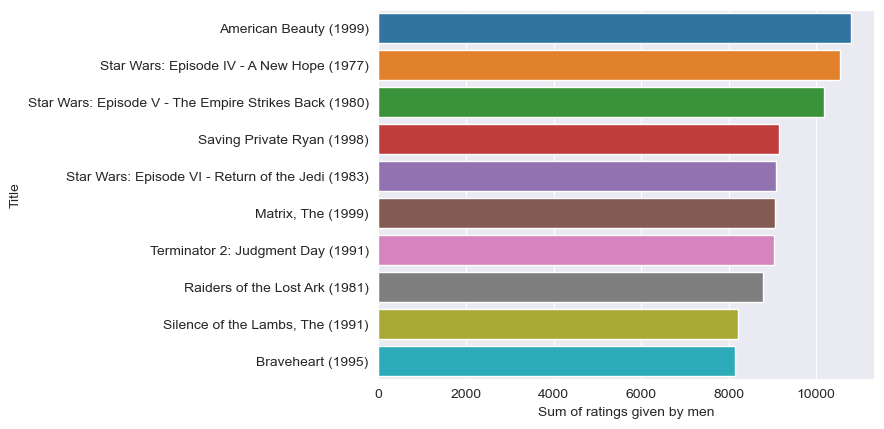

In [10]:
top10_by_M = rating_by_sex.filter(items='M').sort_values(by='M', ascending=False).head(10)
plot_M = sns.barplot(data=top10_by_M, y = top10_by_M.index, x = 'M')
plot_M.set_xlabel('Sum of ratings given by men')
plot_M.set_ylabel('Title')
plot_M

<AxesSubplot: xlabel='Sum of ratings given by women', ylabel='Title'>

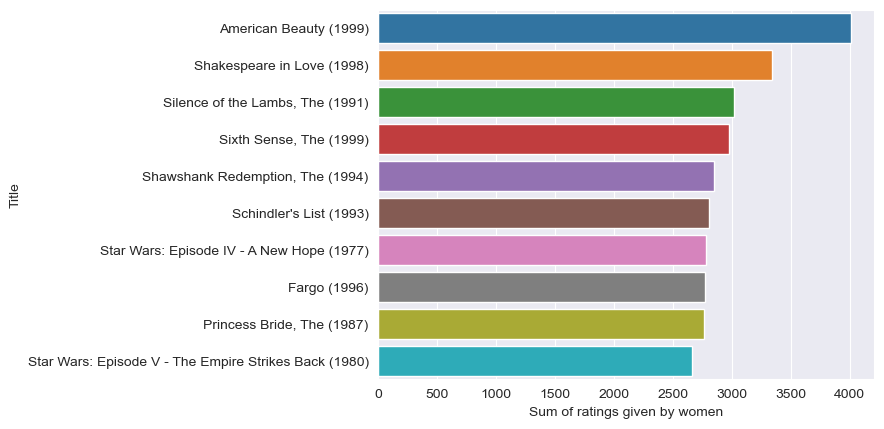

In [11]:
top10_by_F = rating_by_sex.filter(items='F').sort_values(by='F', ascending=False).head(10)
plot_F = sns.barplot(data=top10_by_F, y = top10_by_F.index, x = 'F')
plot_F.set_xlabel('Sum of ratings given by women')
plot_F.set_ylabel('Title')
plot_F

In [12]:
Ages = np.sort(users_table.Age.unique())
Genders = users_table.Gender.unique()
pivot_columns = [
pivot_dataframe[[(Age, Gender)]].sort_values(by=(Age, Gender), ascending=False)
    for Age in Ages
    for Gender in Genders
]
pivot_10row_columns = [table.head(10) for table in pivot_columns]
pivot_columns

[Age                                             1
 Gender                                          F
 Title                                            
 Toy Story (1995)                            159.0
 Toy Story 2 (1999)                          152.0
 Shakespeare in Love (1998)                  141.0
 Aladdin (1992)                              136.0
 Sixth Sense, The (1999)                     131.0
 ...                                           ...
 Young and Innocent (1937)                     NaN
 Your Friends and Neighbors (1998)             NaN
 Zachariah (1971)                              NaN
 Zed & Two Noughts, A (1985)                   NaN
 Zero Kelvin (Kjжrlighetens kjшtere) (1995)    NaN
 
 [3706 rows x 1 columns],
 Age                                                     1
 Gender                                                  M
 Title                                                    
 Matrix, The (1999)                                  368.0
 Sixth Sense, The (199

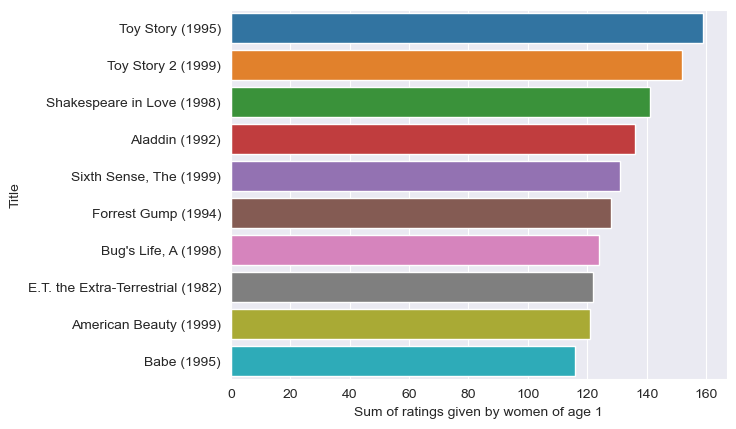

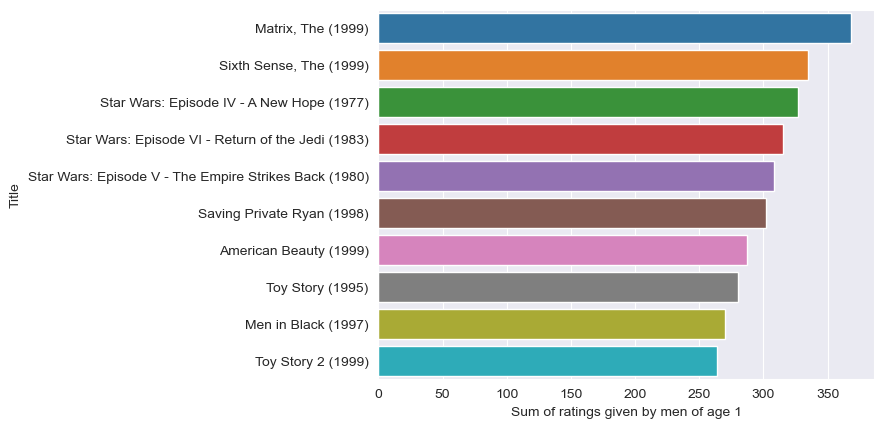

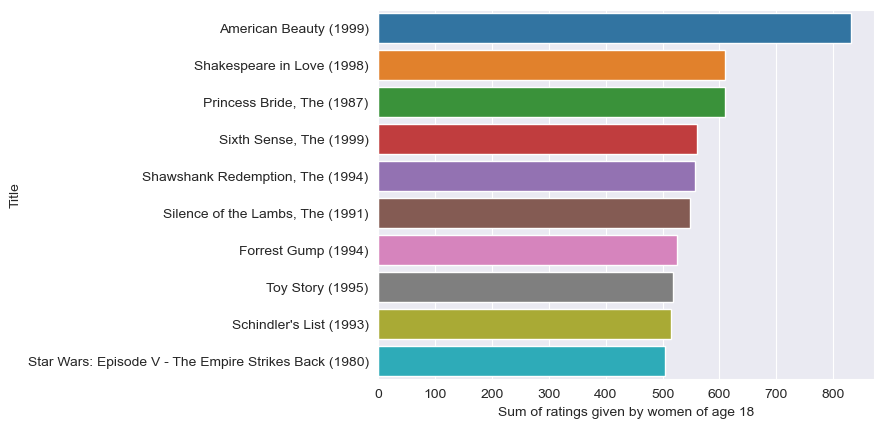

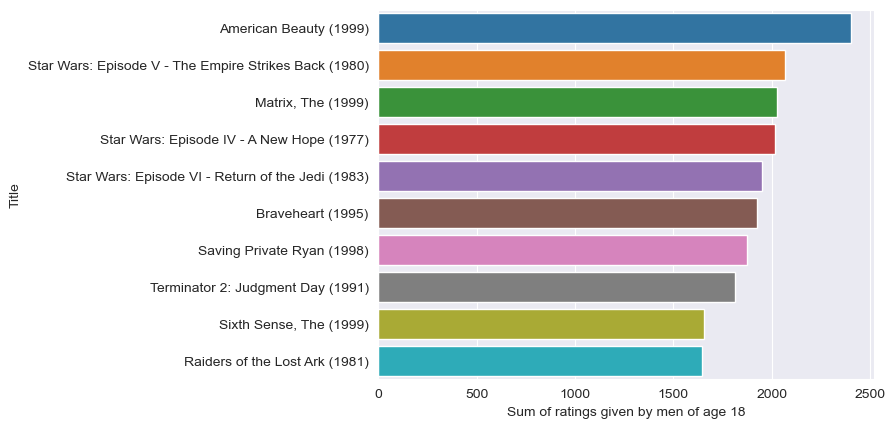

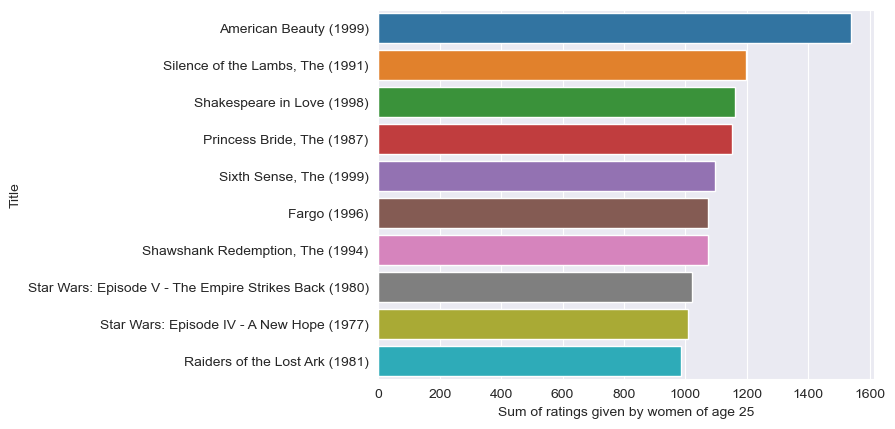

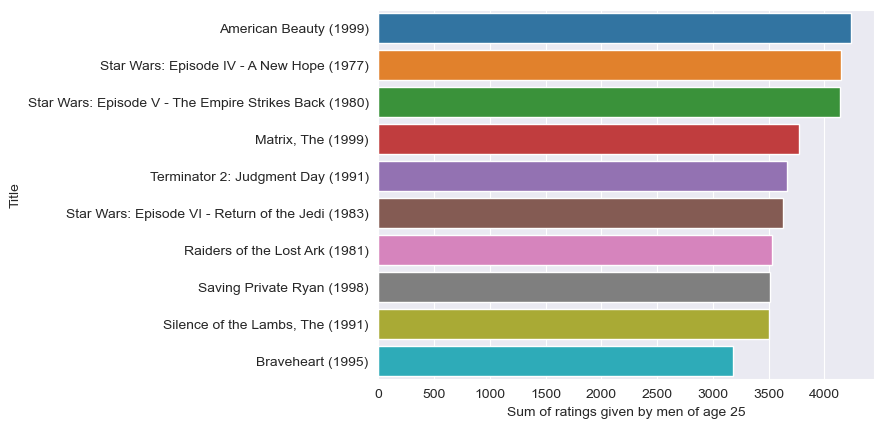

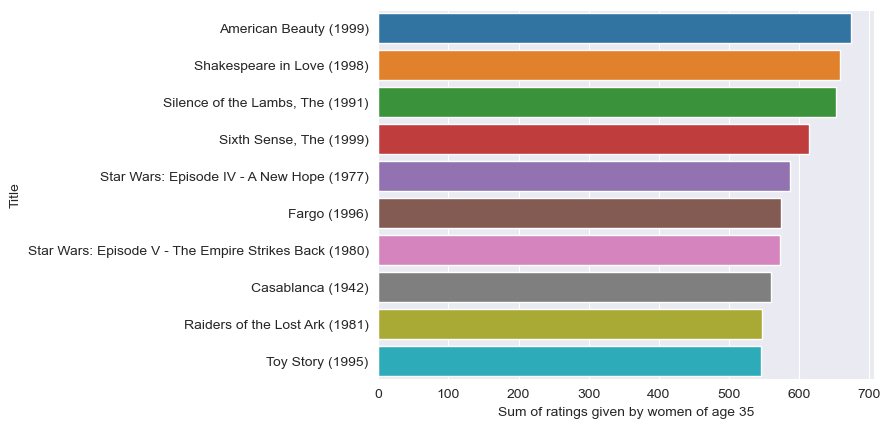

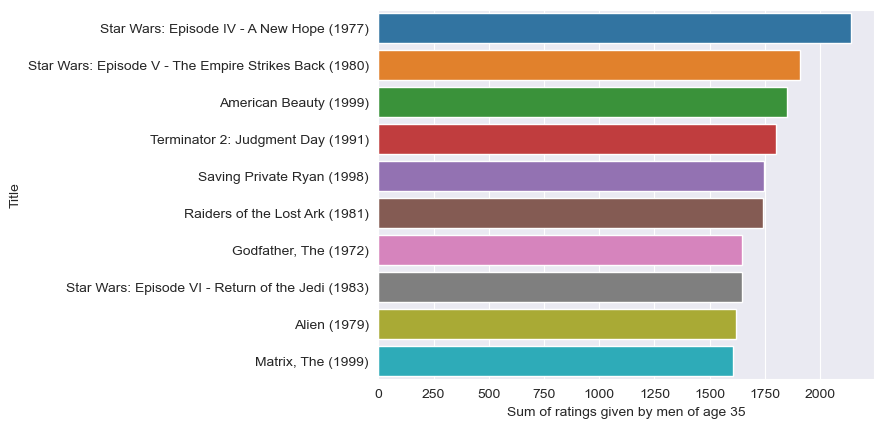

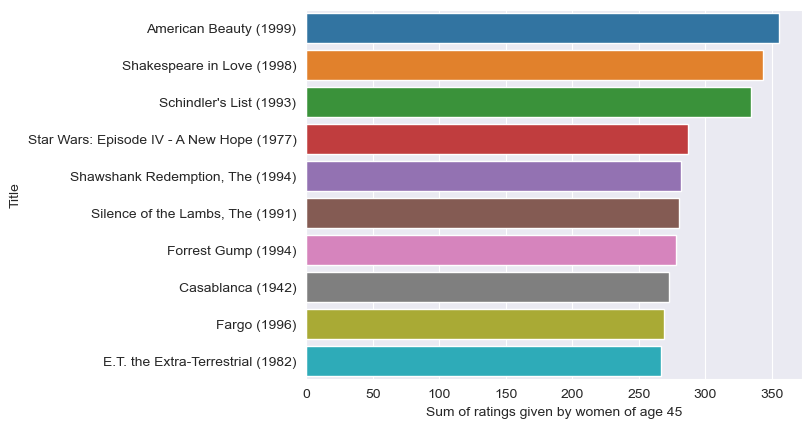

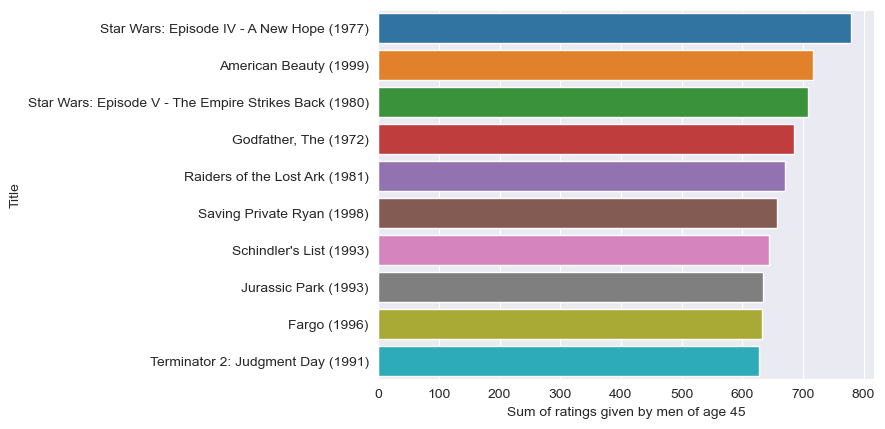

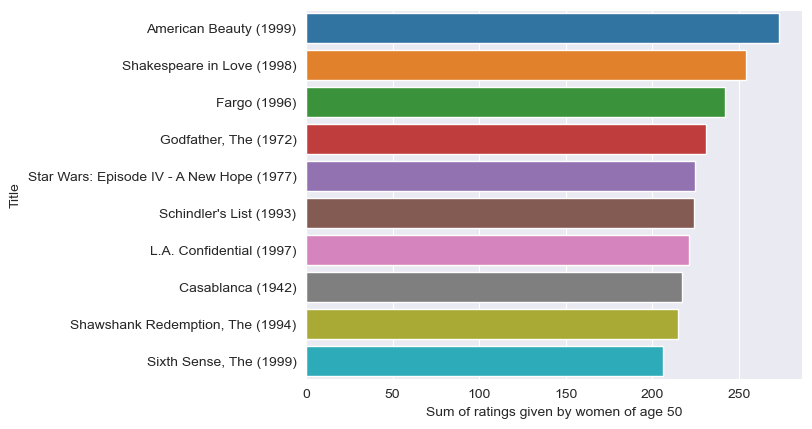

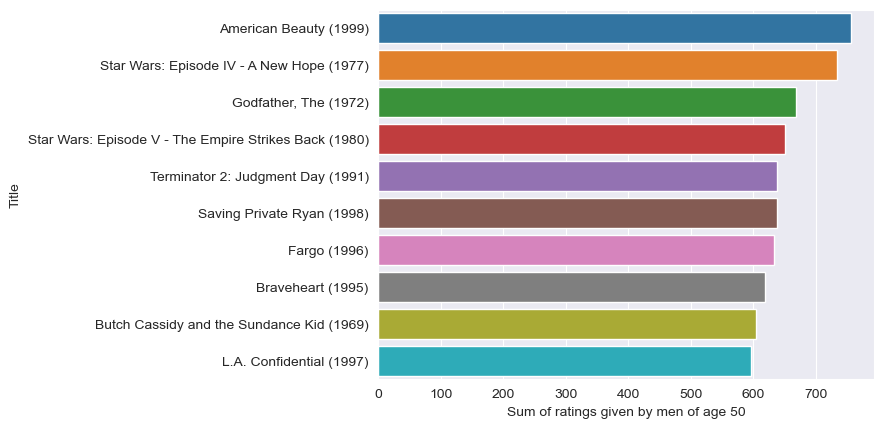

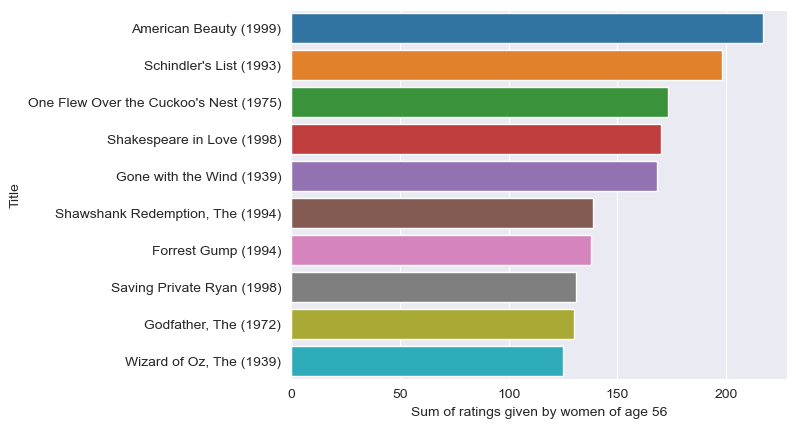

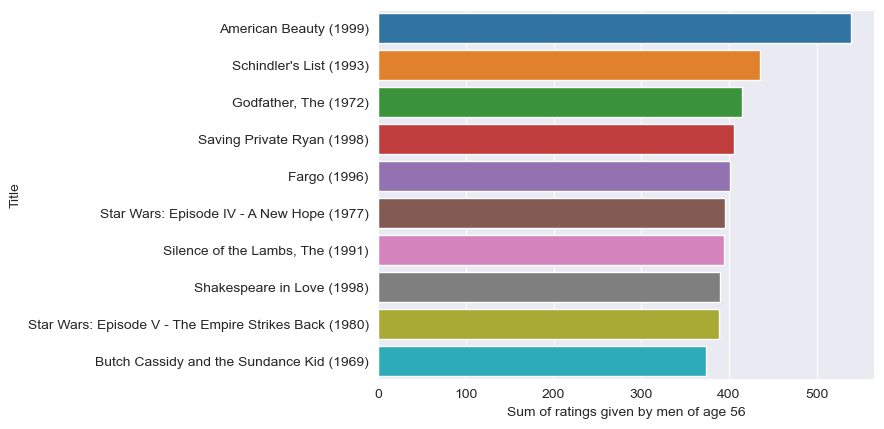

In [13]:
for dataframe in pivot_10row_columns:
        plt.figure()
        plot = sns.barplot(data=dataframe, y = dataframe.index, x=dataframe.columns[0])
        plot.set(xlabel=f"Sum of ratings given by {('men' if dataframe.columns[0][1] == 'M' else 'women')} of age {dataframe.columns[0][0]}",
           ylabel = 'Title')

